In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import glob
import utils
import matplotlib.colors as colors
import cmaps
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from scipy.stats import pearsonr, t as tdist
from scipy.stats import t

In [2]:
def pvalue_array(x,y,dname):
    x_an=x-x.mean(dname)
    y_an=y-y.mean(dname)
    slope=(x_an*y_an).sum(dname)/(x_an*x_an).sum(dname)
    interc=y.mean(dname)-slope*x.mean(dname)
    ypred=slope*x+interc
    n=len(x[dname])
    mse=np.sqrt(((y-ypred)**2).sum(dname)/(n-2))
    xsq=np.sqrt(((x_an)**2).sum(dname))
    standerr=mse/xsq
    pval=2*(1-t.cdf(np.abs(slope/standerr),n-2))
    pval=xr.DataArray(pval,dims=standerr.dims,coords=standerr.coords)
    return pval

def rvalue_array(x,y,dname):
    xmean=x.mean(dname)
    ymean=y.mean(dname)
    numer=(x*y).mean(dname)-xmean*ymean
    denom=np.sqrt(((x**2).mean(dname)-xmean**2)*(((y**2).mean(dname))-(ymean**2)))
    return numer/denom

def regcoeff_array(x,y,dname):
    x_an=x-x.mean(dname)
    y_an=y-y.mean(dname)
    slope=(x_an*y_an).sum(dname)/(x_an*x_an).sum(dname)
    return slope

def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg, skipna=True)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

def trend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg, skipna=True)
    return p

In [3]:
datadir='/Projects/RAPrototype/ERA5'
plotdir='/home/ghervieux/SCRIPTS/GEV/PLOTS'

In [4]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [15]:
datadir='/Projects/era5/Monthlies/monolevel/'

yearb=1940
yeare=2025

# South Alaska Coordinates
ptlon = 211.25 
ptlat =  60.5

ifile = f'{datadir}/tmax.2m.mon.mean.nc' 
dstmax=xr.open_dataset(ifile)
tmax = dstmax['tmax'].sel(lon=ptlon,lat=ptlat)

ifile = f'{datadir}/tmin.2m.mon.mean.nc' 
dstmin=xr.open_dataset(ifile)
tmin = dstmin['tmin'].sel(lon=ptlon,lat=ptlat)

ifile = f'{datadir}/air.2m.mon.mean.nc' 
dsair=xr.open_dataset(ifile)
air = dsair['air'].sel(lon=ptlon,lat=ptlat)

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2755351/3003487706.py:9: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_ylabel(f'Tmax ($\degree$K)', color='k',fontsize=16)
/tmp/ipykernel_2755351/3003487706.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(fontsize=16)


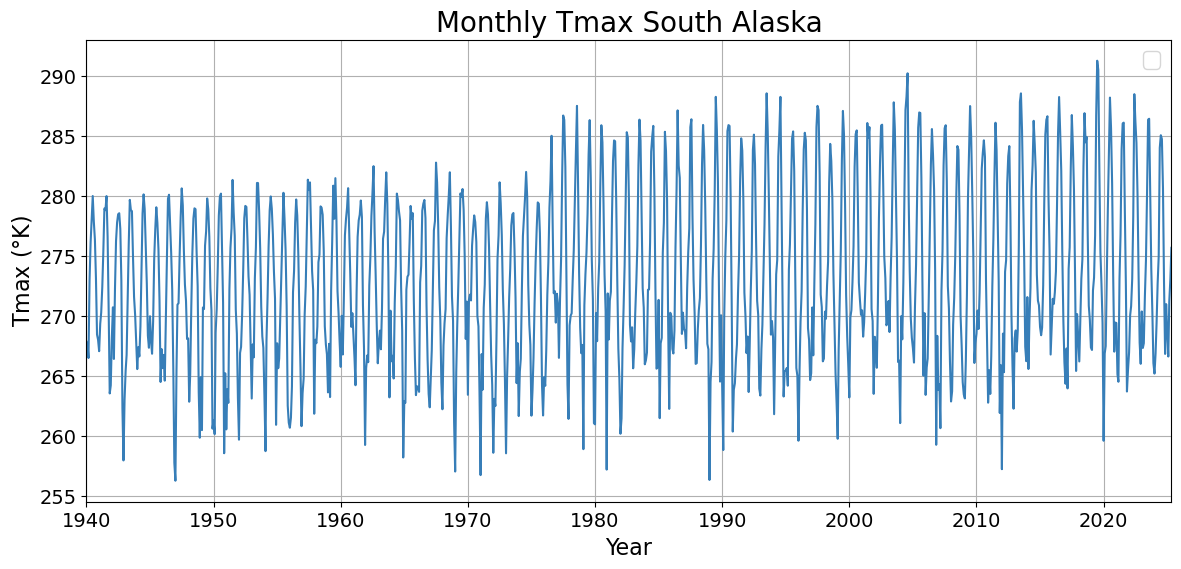

In [ ]:
colors = '#377eb8'
markers = 'o'
Tlabels='South Alaska'
#####
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(dstmax['time'],tmax,color=colors)
ax1.set_xlim(dstmax['time'][0],dstmax['time'][-1])
ax1.set_ylabel(f'Tmax ($\degree$K)', color='k',fontsize=16)
ax1.tick_params(axis='x', labelcolor='k',labelsize=14)
ax1.tick_params(axis='y', labelcolor='k',labelsize=14)
ax1.set_xlabel('Year',fontsize=16)
ax1.grid()
ax1.legend(fontsize=16)
ax1.set_title('Monthly Tmax South Alaska',fontsize=20)
outfile=f'PLOTS/Tmax_SouthAlaska_monthly_timeseries.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2755351/4030606755.py:9: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_ylabel(f'Tmin ($\degree$K)', color='k',fontsize=16)
/tmp/ipykernel_2755351/4030606755.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(fontsize=16)


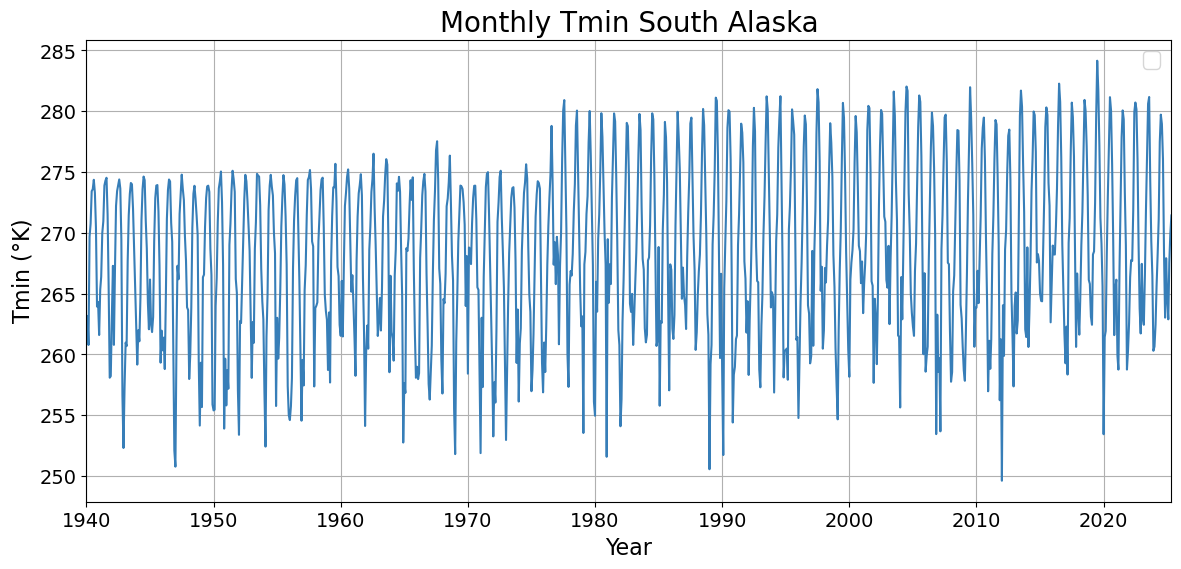

In [16]:
colors = '#377eb8'
markers = 'o'
Tlabels='South Alaska'
#####
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(dstmin['time'],tmin,color=colors)
ax1.set_xlim(dstmin['time'][0],dstmin['time'][-1])
ax1.set_ylabel(f'Tmin ($\degree$K)', color='k',fontsize=16)
ax1.tick_params(axis='x', labelcolor='k',labelsize=14)
ax1.tick_params(axis='y', labelcolor='k',labelsize=14)
ax1.set_xlabel('Year',fontsize=16)
ax1.grid()
ax1.legend(fontsize=16)
ax1.set_title('Monthly Tmin South Alaska',fontsize=20)
outfile=f'PLOTS/Tmin_SouthAlaska_monthly_timeseries.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_2755351/3536181377.py:9: SyntaxWarning: invalid escape sequence '\d'
  ax1.set_ylabel(f'air.2m ($\degree$K)', color='k',fontsize=16)
/tmp/ipykernel_2755351/3536181377.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(fontsize=16)


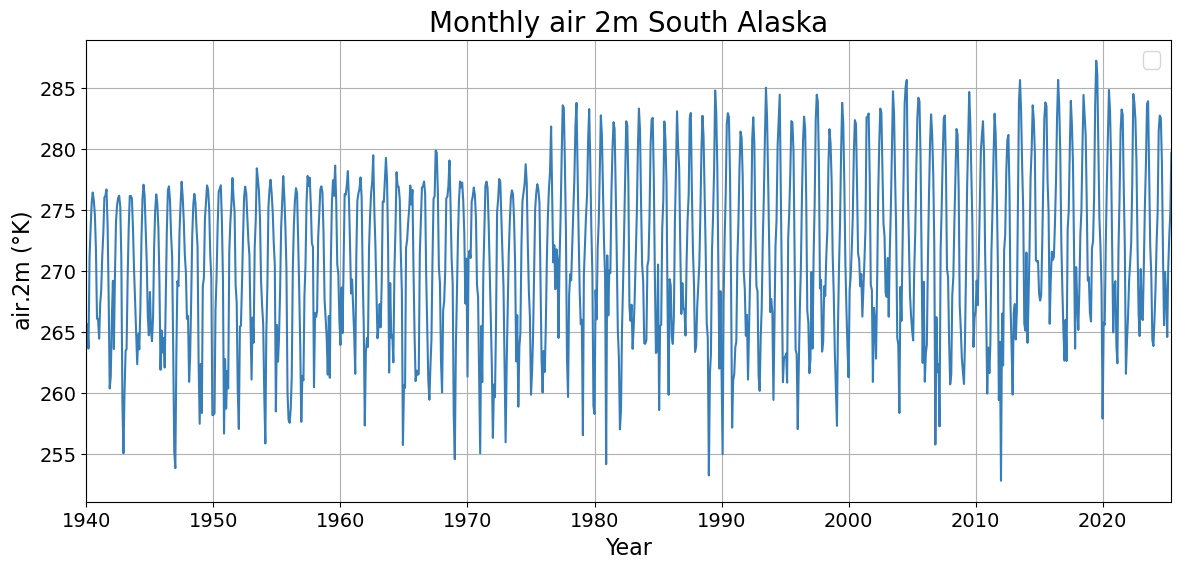

In [17]:
colors = '#377eb8'
markers = 'o'
Tlabels='South Alaska'
#####
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(dsair['time'],air,color=colors)
ax1.set_xlim(dsair['time'][0],dsair['time'][-1])
ax1.set_ylabel(f'air.2m ($\degree$K)', color='k',fontsize=16)
ax1.tick_params(axis='x', labelcolor='k',labelsize=14)
ax1.tick_params(axis='y', labelcolor='k',labelsize=14)
ax1.set_xlabel('Year',fontsize=16)
ax1.grid()
ax1.legend(fontsize=16)
ax1.set_title('Monthly air 2m South Alaska',fontsize=20)
outfile=f'PLOTS/air2m_SouthAlaska_monthly_timeseries.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')